## **Evaluate classification results produced from model**

In [1]:
# enter model path and filenames
model_name = 'Resnet'
model_path = '/home/ubuntu/michael/model_output/Resnet/night/'
model_score = 'Resnet_score.pkl'
history_file = 'Resnet_history.pkl'
model_file = 'Resnet_model.hdf5'

## **Access data saved during testing**

In [2]:
import pandas as pd

In [3]:
# open pickle file with score object (validation loss and accuracy during training)
score = pd.read_pickle(model_path + model_score)
score[0] = round(score[0], 4)
score[1] = round(score[1], 4)
print(f'Validation Accuracy: {score[1]}, Validation Loss: {score[0]} for {model_name} model')

Validation Accuracy: 0.8694, Validation Loss: 0.3231 for Resnet model


In [4]:
# create dataframe from pickle file of history object containig accuracy and loss values during trainingand create dataframe
history = pd.read_pickle(model_path + history_file)
history

,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy
0,2.257346,0.564058,1.488199,0.604811
1,1.256393,0.609630,2.426700,0.570447
2,1.026829,0.641874,0.464793,0.814433
3,0.805776,0.667670,0.640442,0.635739
4,0.620166,0.699914,0.452423,0.824742
...,...,...,...,...
146,0.372175,0.846088,0.330366,0.869416
147,0.360658,0.853826,0.344929,0.852234
148,0.370584,0.854686,0.327376,0.862543
149,0.371229,0.854256,0.400274,0.831615


## **Visualize accuracy and loss during training**

In [5]:
import matplotlib.pyplot as plt
import sys

In [6]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history['Training Loss'], color='blue', label='train')
    plt.plot(history['Validation Loss'], color='orange', label='validation')
    plt.legend()
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history['Training Accuracy'], color='blue', label='train')
    plt.plot(history['Validation Accuracy'], color='orange', label='validation')
    plt.legend()
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

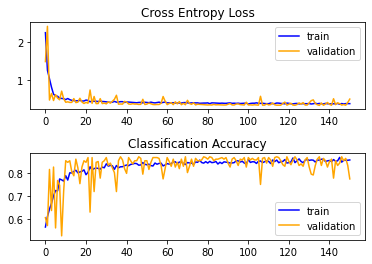

In [7]:
summarize_diagnostics(history)

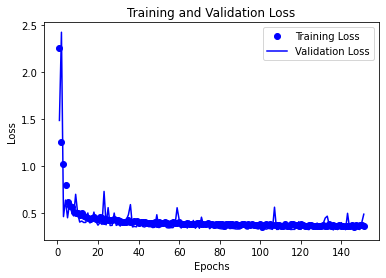

In [8]:
# plot training and validation loss
history_dict = history
history_dict.keys()
loss_values = history_dict['Training Loss']
val_loss_values = history_dict['Validation Loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

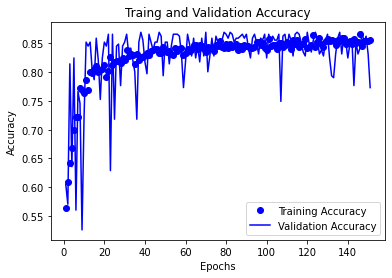

In [9]:
# plot training and validation accuracy
plt.clf() # clear figure
acc = history_dict['Training Accuracy']
val_acc = history_dict['Validation Accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Traing and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Load test dataset**

In [10]:
# point to test image directory
test_dir = '/home/ubuntu/michael/night/test' # night images only

In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# set image size and shape
img_size = (224, 224)
img_shape = (224, 224, 3)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0) #scale 

In [14]:
test_it = test_datagen.flow_from_directory(directory = test_dir, classes = ['nofog', 'fog'], class_mode = 'binary',
                    batch_size = 16, target_size = img_size)

Found 291 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in test_it:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')
    break

data batch shape: (16, 224, 224, 3)
labels batch shape: (16,)


In [16]:
test_it.class_indices

{'nofog': 0, 'fog': 1}

In [17]:
test_it.labels # displays an array of 0s and 1s for the assigned label for each image

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

## **Load model used**

In [18]:
import tensorflow.keras.models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [19]:
# load pretrained base model Resnet
from tensorflow.keras.applications import ResNet50
conv_base = ResNet50(input_shape = img_shape, include_top = False, weights = 'imagenet')
conv_base.trainable = False

In [20]:
# create classification portion of model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              102761472 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 126,350,209
Trainable params: 102,762,497
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
from tensorflow.keras.optimizers import RMSprop

In [23]:
# compile model
model.compile(loss = 'binary_crossentropy', optimizer =  RMSprop(lr = 1e-4), metrics = ['acc'])

In [24]:
# evaluate model
score = model.evaluate(test_it, steps=len(test_it), verbose = 1)
loss = round(score[0], 4)
accuracy = round(score[1], 4)
print(f'Loss: {loss}, Accuracy: {accuracy}')

19/19 [==============================] - 20s 503ms/step - loss: 0.7881 - acc: 0.5006
Loss: 0.7632, Accuracy: 0.5258


## **Evaluate model after adding learned weights**

In [25]:
import h5py    
import numpy as np 

In [26]:
# load weights from checkpoint
model.load_weights(model_path + model_file)

In [27]:
with h5py.File(model_path + model_file, 'r') as f:
    # list all groups
    print('Keys: %s' % f.keys())
    a_group_key = list(f.keys())[0]
    
    # get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [28]:
# re-evaluate model
score = model.evaluate(test_it, steps=len(test_it), verbose = 2)
loss = round(score[0], 4)
accuracy = round(score[1], 4)
print(f'Loss: {loss}, Accuracy: {accuracy}')

19/19 - 1s - loss: 0.3047 - acc: 0.8797
Loss: 0.3047, Accuracy: 0.8797


## **Access test dataframe for importing images**

In [29]:
# point to source directory and file
src_dir = '/home/ubuntu/michael/my_pickles/'
infile = 'night_test_df.pkl' # night only dataframe

In [30]:
# assign saved dataframe to sample dataframe 
test_df = pd.read_pickle(src_dir + infile)
test_df

,filename,label,day_phase,phase,filepath,y_true
2617,A9-HM430-ID12784_20190402_0241.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A9-...,0
2618,A9-HM443-ID12790_20191231_2241.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A9-...,1
2619,A4-HM697-ID12278_20170915_2031.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A4-...,0
2620,A50-HM1852-ID11644_20200122_2320.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A50...,0
2621,A16-HM264-ID12263_20200123_0140.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A16...,1
...,...,...,...,...,...,...
2903,A9-HM469-ID12805_20190814_0130.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A9-...,0
2904,A50-HM1941-ID11612_20200122_2311.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A50...,1
2905,A50-HM1894-ID11530_20200101_0621.jpg,Fog,20,Night,/home/ubuntu/michael/nl_images/images_data/A50...,1
2906,A50-HM1924-ID11541_20190812_0140.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A50...,1


In [31]:
# create a list of the ground-truth labels
labels = test_df.y_true.tolist()
len(labels)

291

In [32]:
# visualize classes count
test_df.groupby('label').count()

,filename,day_phase,phase,filepath,y_true
label,,,,,
Fog,153,153,153,153,153
No Fog,138,138,138,138,138


In [33]:
# image source location
src = '/home/ubuntu/backup_images_2/images01062021'

In [34]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

In [35]:
import os
image_list = []
for filepath in test_df.filepath.values:
    fn = os.path.basename(filepath)
    fp = os.path.join(src, fn)
    img = load_img(fp, target_size = img_size)
    img = img_to_array(img)
    img = img / 255.
    image_list.append(img)
images = np.asarray(image_list)
images.shape

(291, 224, 224, 3)

## **Make probability predictions for test set**

In [36]:
# use model to make predictions on test set
import pickle
probabilities = model.predict(images)
len(probabilities)

291

In [37]:
# force probabilities greater than 0.5 as integers
y_pred = (probabilities > 0.5).astype('int32')
len(y_pred)

291

In [38]:
y_true = test_df['y_true']
#y_pred = y_pred.tolist()

In [40]:
y_test = test_df['y_true']
len(y_test)

291

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc

In [42]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
print(thresholds)

[0 1]


In [43]:
precision

array([0.5257732 , 0.94029851, 1.        ])

In [44]:
recall

array([1.        , 0.82352941, 0.        ])

In [47]:
auc_score = auc(recall, precision)
auc_score

0.9283057121910158

In [48]:
prerec_df = pd.DataFrame()
prerec_df['Precision'] = precision
prerec_df['Recall'] = recall
prerec_df

,Precision,Recall
0,0.525773,1.000000
1,0.940299,0.823529
2,1.000000,0.000000


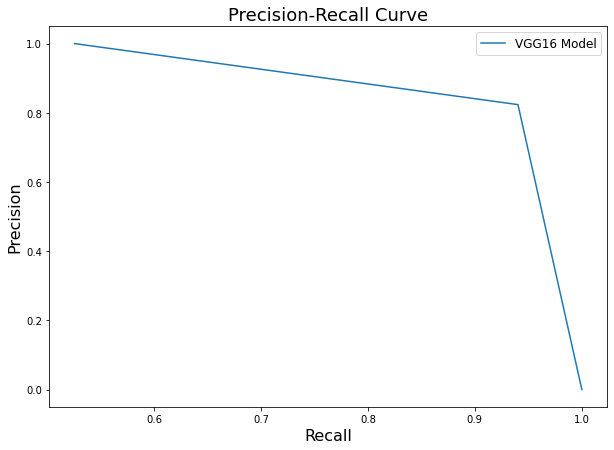

In [49]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(precision, recall, label = 'VGG16 Model')
plt.title('Precision-Recall Curve', fontsize = 18)
plt.ylabel('Precision', fontsize = 16)
plt.xlabel('Recall', fontsize = 16)
plt.legend(fontsize = 12, loc = 'upper right')
plt.savefig(model_path + 'VGG16_prerec.jpg')

## **Create dataframe of probabilities and original labels**

In [39]:
# create a list of test image probabilities
t_img_prob = []
for index, probability in enumerate(probabilities):
    prob = probabilities[index][0]
    t_img_prob.append(prob)

In [40]:
# create lists of test image filepaths
t_img_fps = [] # test image filepaths
for i, image in enumerate(test_df.filepath.values):
    t_img_fps.append(image)
    
# store filepaths in dataframe
t_img_df = pd.DataFrame()
t_img_df['Filepath'] = t_img_fps
t_img_df['Label'] = labels
t_img_df['Probability'] = t_img_prob
t_img_df.head()

,Filepath,Label,Probability
0,/home/ubuntu/michael/nl_images/images_data/A9-...,0,0.011734
1,/home/ubuntu/michael/nl_images/images_data/A9-...,1,0.931676
2,/home/ubuntu/michael/nl_images/images_data/A4-...,0,0.124923
3,/home/ubuntu/michael/nl_images/images_data/A50...,0,0.050174
4,/home/ubuntu/michael/nl_images/images_data/A16...,1,0.170371


## **Identify and visualize test images with High probability of being fog**

In [41]:
# subset dataframe for test images with high probability of being fog
t_img_hprob_df = t_img_df[t_img_df.Probability >= 0.75]

# extract a random sample of 12 images for visualization
hprob_sample_df = t_img_hprob_df.sample(n = 16, replace = True, axis=None)

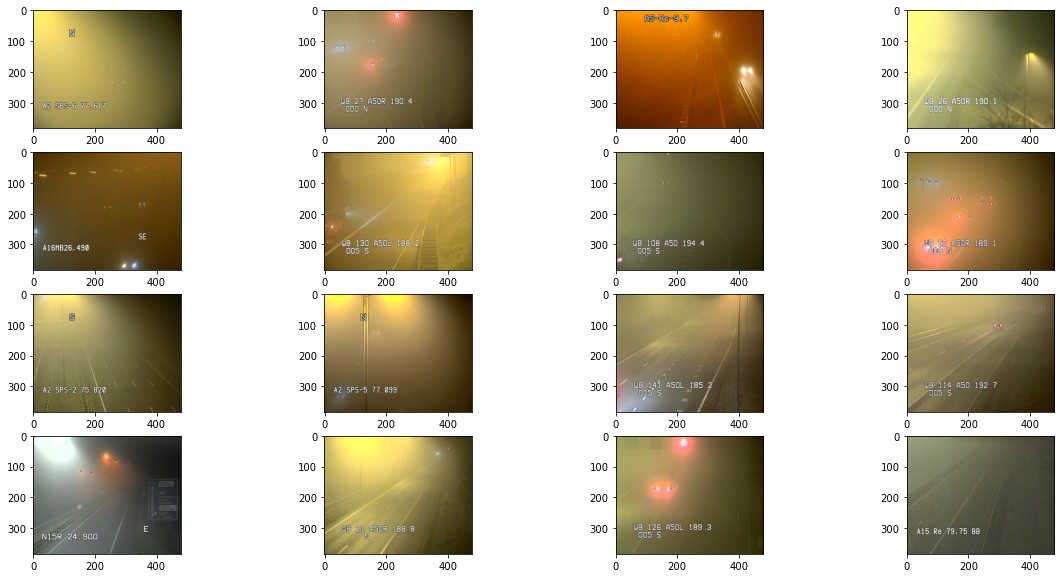

In [42]:
# visualize images identified as high probabiity of being fog
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, path in enumerate(hprob_sample_df.Filepath):
    fn = os.path.basename(path)
    fp = os.path.join(src, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.imshow(img)

## **Identify and visualize test images with Low probability of being fog**

In [58]:
# subset dataframe for test images with low probability of being fog
t_img_lprob_df = t_img_df[t_img_df.Probability <= 0.25]

# extract a random sample of 12 images for visualization
lprob_sample_df = t_img_lprob_df.sample(n = 16, replace = True, axis=None)

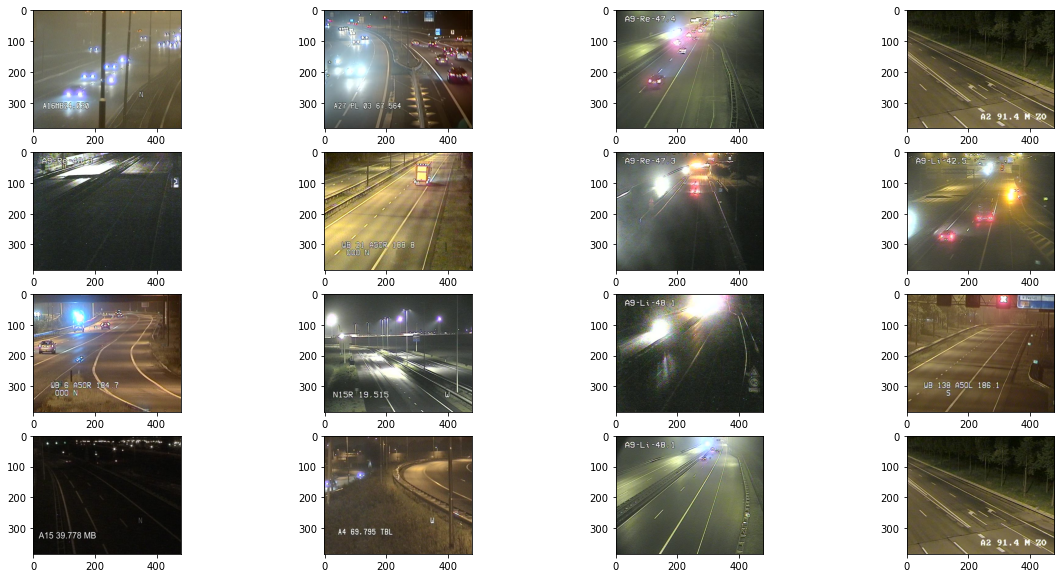

In [59]:
# visualize images identified as low probabiity of being fog
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, path in enumerate(lprob_sample_df.Filepath):
    fn = os.path.basename(path)
    fp = os.path.join(src, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.imshow(img)

## **Identify and visualize test images with that are borderline cases fog**

In [60]:
# subset dataframe for test images that are borderline
t_img_bprob_df = t_img_df[(t_img_df.Probability > 0.45) & (t_img_df.Probability < 0.55)]
len(t_img_bprob_df)

9

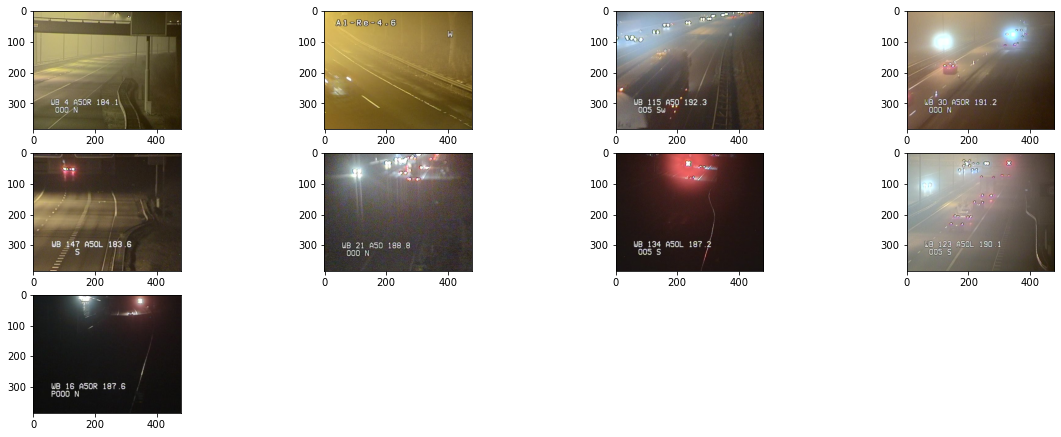

In [61]:
# visualize images identified as being borderline cases
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, path in enumerate(t_img_bprob_df.Filepath):
    fn = os.path.basename(path)
    fp = os.path.join(src, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.imshow(img)

## **Build confusion matrix and visualize metrics**

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [63]:
# force all values greater than 0.5 to be 1 for fog since it is class A
y_pred = (probabilities > 0.5).astype('int32')

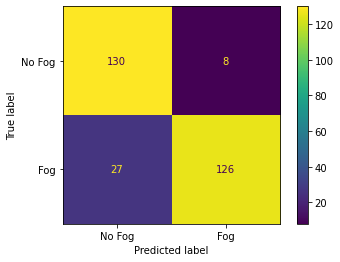

In [64]:
labels = ['No Fog', 'Fog']
y_true = test_df.y_true.to_list()
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()

In [65]:
from sklearn.metrics import classification_report

cr = classification_report(y_true, y_pred, target_names=labels)
print(cr)

              precision    recall  f1-score   support

      No Fog       0.83      0.94      0.88       138
         Fog       0.94      0.82      0.88       153

    accuracy                           0.88       291
   macro avg       0.88      0.88      0.88       291
weighted avg       0.89      0.88      0.88       291



## **Create ROC graph and display AUC**

In [66]:
probs = np.array(probabilities)
probs.shape # (291, )
probs = probs.tolist()

In [67]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_true, y_pred)
auc = auc(fpr, tpr)
auc

0.8827791986359761

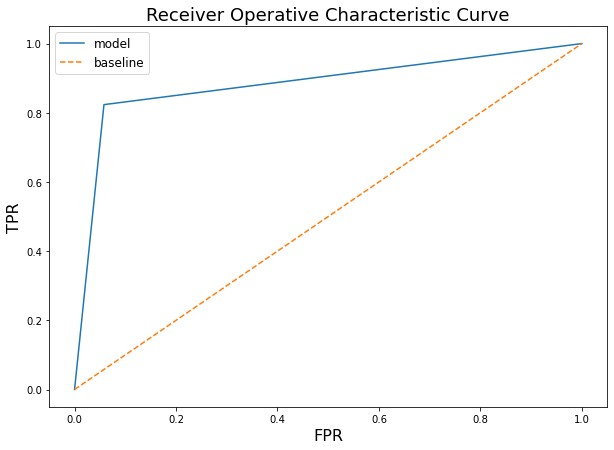

In [68]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(fpr, tpr, label = 'model')
ax.plot(np.linspace(0, 1, 100),
        np.linspace(0, 1, 100),
        label = 'baseline',
        linestyle = '--')
plt.title('Receiver Operative Characteristic Curve', fontsize = 18)
plt.ylabel('TPR', fontsize = 16)
plt.xlabel('FPR', fontsize = 16)
plt.legend(fontsize = 12)

## **Identify and visualize false positives**

In [69]:
import os
import matplotlib.pyplot as plt

In [70]:
# assignment of actual and prediction values
test_df['y_true'] = y_true
test_df['y_pred'] = y_pred

# find images in test dataframe that are false positive
fp = test_df[(test_df.y_true == 0) & (test_df.y_pred == 1)]
len(fp)

8

In [71]:
# get the list of false positive filenames
fp_filenames = fp.filename.values
len(fp_filenames)

8

IndexError: index 8 is out of bounds for axis 0 with size 8

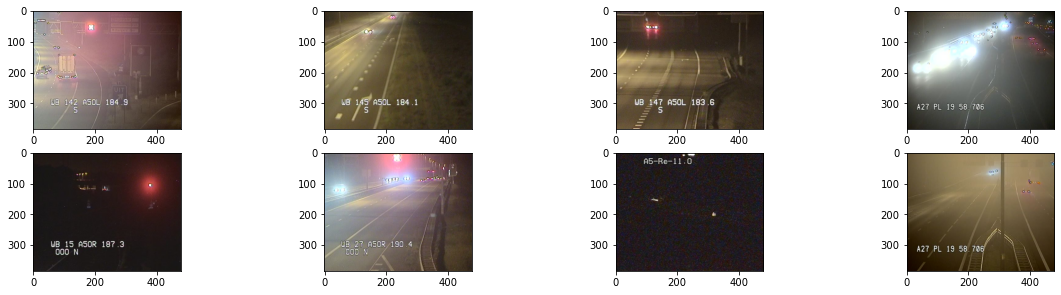

In [72]:
# visualize the false positives
rows = 4
cols = 4
axes =[]

fig = plt.figure(figsize = (20, 10))

for i in range((rows*cols)-1):
    path = os.path.join(src + '/' + fp_filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i + 1)) # add 1 b/c 
    plt.imshow(img)

## **Identify and visualize false negatives**

In [73]:
# assignment of actual and prediction values
test_df['y_true'] = y_true
test_df['y_pred'] = y_pred

# find images in test dataframe that are false positive
fn = test_df[(test_df.y_true == 1) & (test_df.y_pred == 0)]
len(fn)

27

In [74]:
# get the list of false negative filenames
fn_filenames = fn.filename.values
len(fn_filenames)

27

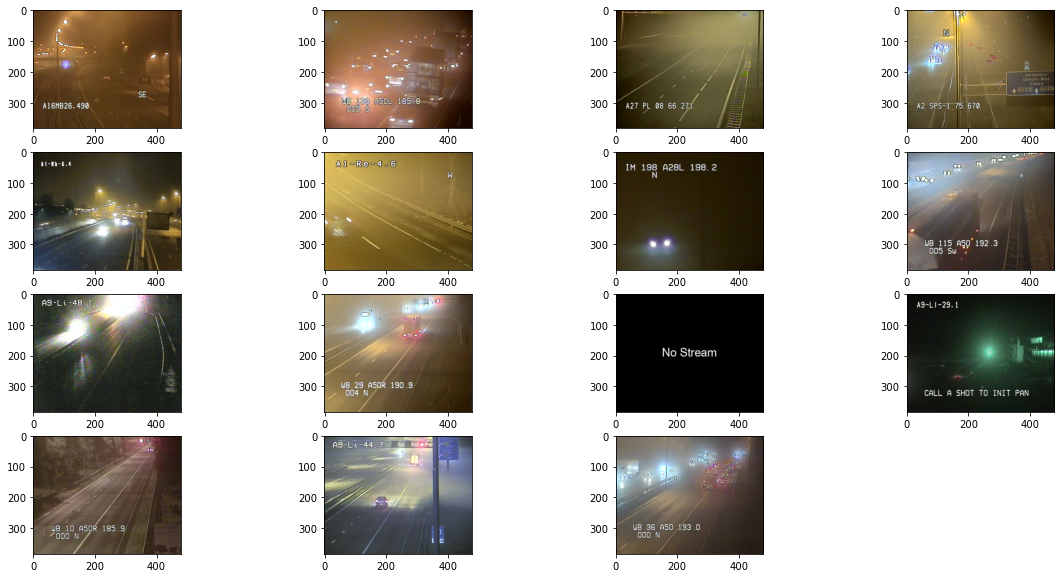

In [75]:
# visualize the false negative images
rows = 4
cols = 4
axes =[]

fig = plt.figure(figsize = (20, 10))

for i in range((rows*cols)-1):
    path = os.path.join(src + '/' + fn_filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i + 1)) # add 1 b/c 
    plt.imshow(img)